In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [18]:
dataset = pd.read_excel('fluML.xlsx')
columns = list(dataset)
columns.remove('Student') #Student is an identifier number given to every student
dataset.describe()
#Dependant variable is 'Flu'. 

,Student,Vaccin,HndWshQual,HndWshFreq,SocialDist,NotTchFace,RespEtiq,PrsnlDist,HandSanit,Risk,Complic,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Gender
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,409.000000,410.000000,374.000000,374.000000,375.000000
mean,205.500000,3.370732,3.885366,3.226829,2.909756,2.456098,4.102439,3.412195,2.785366,-0.103863,-0.322485,-0.392522,-0.055388,0.054071,0.206666,0.986631,0.208556,0.549333
std,118.501055,1.366423,1.036748,1.155305,1.176025,1.246717,1.250621,1.129012,1.583157,0.485028,0.511090,0.433467,0.515823,0.818013,0.726531,0.656853,0.406821,0.498225
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.453000,-1.453000,-1.868000,-1.696000,-1.393000,-1.482000,0.000000,0.000000,0.000000
25%,103.250000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,-0.376000,-0.575000,-0.658000,-0.400000,-0.554000,-0.335000,1.000000,0.000000,0.000000
50%,205.500000,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,0.000000,-0.376000,-0.448000,0.000000,0.182000,0.335000,1.000000,0.000000,1.000000
75%,307.750000,5.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,0.169000,0.000000,-0.206000,0.299750,0.554000,0.684000,1.000000,0.000000,1.000000
max,410.000000,9.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.000000,5.000000,1.453000,1.453000,1.653000,1.696000,1.393000,1.482000,2.000000,1.000000,1.000000


In [19]:
#remove student
dataset = dataset.drop('Student',axis=1)

#remove outliers. Features above 5 are errors in data entry as suggested by author.
dataset = dataset[dataset[columns] <= 5]

#remove NaN values.
dataset = dataset.dropna()

dataset.describe()

,Vaccin,HndWshQual,HndWshFreq,SocialDist,NotTchFace,RespEtiq,PrsnlDist,HandSanit,Risk,Complic,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Gender
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,3.375723,3.907514,3.236994,2.916185,2.456647,4.173410,3.390173,2.800578,-0.125812,-0.349535,-0.440465,-0.056876,0.139052,0.303023,0.968208,0.193642,0.543353
std,1.297887,1.022983,1.130046,1.172844,1.210880,1.191267,1.114238,1.605462,0.474208,0.505263,0.407629,0.525803,0.798902,0.690627,0.647515,0.395724,0.498838
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.453000,-1.453000,-1.868000,-1.696000,-1.393000,-1.482000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,-0.376000,-0.695000,-0.658000,-0.406000,-0.554000,0.000000,1.000000,0.000000,0.000000
50%,3.000000,4.000000,3.000000,3.000000,2.000000,5.000000,3.000000,3.000000,0.000000,-0.376000,-0.486500,0.000000,0.182000,0.335000,1.000000,0.000000,1.000000
75%,5.000000,5.000000,4.000000,3.000000,3.000000,5.000000,4.000000,4.000000,0.169000,0.000000,-0.247000,0.304000,0.951000,0.684000,1.000000,0.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.453000,1.453000,1.653000,1.696000,1.393000,1.482000,2.000000,1.000000,1.000000


In [20]:
dataset.corr()
#'Sick' is highly correlated with the dependant variable. Remove it.
#'Sick' has 3 values - 0,1 and 2 each one representing a type of illness.

,Vaccin,HndWshQual,HndWshFreq,SocialDist,NotTchFace,RespEtiq,PrsnlDist,HandSanit,Risk,Complic,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Sick,Flu,Gender
Vaccin,1.000000,-0.047978,-0.051006,0.039789,-0.024648,0.025227,0.046655,0.006851,0.131289,-0.013346,-0.053837,-0.018451,0.023921,0.097842,0.138419,0.100605,0.059831
HndWshQual,-0.047978,1.000000,0.314884,0.181958,0.071633,0.141638,0.095323,0.186403,-0.049103,-0.104811,-0.277622,-0.134278,0.038633,0.068243,-0.105096,-0.127475,0.127161
HndWshFreq,-0.051006,0.314884,1.000000,0.144062,0.062606,0.180392,0.000013,0.158732,0.013342,-0.072336,-0.207341,-0.160909,0.079848,0.228244,-0.001557,-0.018658,0.146262
SocialDist,0.039789,0.181958,0.144062,1.000000,0.098463,0.000060,0.093855,0.146573,0.039397,0.144432,-0.040812,-0.173101,-0.073883,-0.088275,0.015565,0.028826,0.023569
NotTchFace,-0.024648,0.071633,0.062606,0.098463,1.000000,-0.059075,0.112471,0.045489,-0.084722,-0.000675,-0.008465,-0.081366,-0.107688,-0.079839,-0.022096,0.056889,-0.066460
RespEtiq,0.025227,0.141638,0.180392,0.000060,-0.059075,1.000000,-0.077326,-0.024301,0.005073,-0.192404,-0.216958,-0.203785,0.216547,0.218531,-0.011621,-0.016100,0.060477
PrsnlDist,0.046655,0.095323,0.000013,0.093855,0.112471,-0.077326,1.000000,0.155425,0.087704,0.077101,-0.096455,-0.079757,0.048638,0.100419,0.109644,0.071380,-0.012268
HandSanit,0.006851,0.186403,0.158732,0.146573,0.045489,-0.024301,0.155425,1.000000,0.055685,0.068024,-0.154071,-0.146949,-0.125549,-0.004053,0.016190,-0.012039,0.150168
Risk,0.131289,-0.049103,0.013342,0.039397,-0.084722,0.005073,0.087704,0.055685,1.000000,0.268562,0.172066,-0.016562,-0.004617,-0.071703,0.361799,0.391643,0.023608
Complic,-0.013346,-0.104811,-0.072336,0.144432,-0.000675,-0.192404,0.077101,0.068024,0.268562,1.000000,0.439864,0.005490,-0.288064,-0.343288,0.193627,0.171132,0.062417


In [21]:
#Remove 'Sick'
columns.remove('Sick')
dataset = dataset.drop('Sick',axis=1)

In [22]:
#Normalize data 
scaler = MinMaxScaler(feature_range = (0,1))
dataset = pd.DataFrame(scaler.fit_transform(dataset),columns=columns)

,Vaccin,HndWshQual,HndWshFreq,SocialDist,NotTchFace,RespEtiq,PrsnlDist,HandSanit,Risk,Complic,Barriers,Inefficacy,KnowlTrans,KnowlMgmt,Flu,Gender
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.593931,0.726879,0.559249,0.479046,0.364162,0.793353,0.597543,0.450145,0.456706,0.379720,0.405434,0.483232,0.549911,0.602235,0.193642,0.543353
std,0.324472,0.255746,0.282512,0.293211,0.302720,0.297817,0.278560,0.401365,0.163183,0.173869,0.115771,0.155013,0.286756,0.233005,0.395724,0.498838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.500000,0.250000,0.250000,0.500000,0.500000,0.000000,0.370613,0.260840,0.343652,0.380307,0.301149,0.500000,0.000000,0.000000
50%,0.500000,0.750000,0.500000,0.500000,0.250000,1.000000,0.500000,0.500000,0.500000,0.370613,0.392360,0.500000,0.565327,0.613023,0.000000,1.000000
75%,1.000000,1.000000,0.750000,0.500000,0.500000,1.000000,0.750000,0.750000,0.558156,0.500000,0.460381,0.589623,0.841350,0.730769,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Visualize dataset
columns.remove('Flu')
X = dataset[columns].values
y = dataset['Flu'].values

/Users/ass6ash/anaconda/lib/python3.6/site-packages/sklearn/lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


explained variance ratio (first two components): [ 0.2178062  0.1395429]


/Users/ass6ash/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


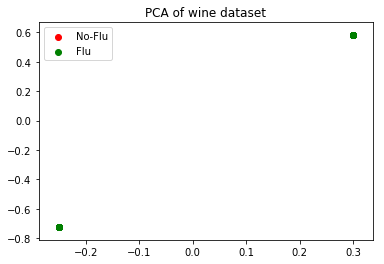

In [9]:
from sklearn.decomposition import PCA
from sklearn.lda import LDA

classes = ['No-Flu','Flu']

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LDA(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
for c, i, target_name in zip("rg", [0, 1], classes):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], c=c, label=target_name)
plt.legend()
plt.title('PCA of wine dataset')

plt.show()

In [10]:
# Smh...Not expecting classifiers to have optimistic results
# Feature selection below

Optimal number of features : 11


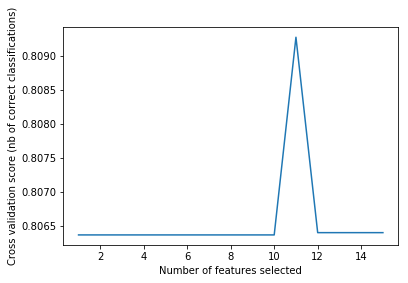

In [11]:

#Recursive feature elimination with Cross validation

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [12]:
#Lets see the 11 best features according to RFE
ranks = rfecv.ranking_

rfe_selected_features = [feature for feature,rank in zip(columns,ranks) if rank == 1]
rfe_discarded_features = [feature for feature,rank in zip(columns,ranks) if rank != 1]

print("Features selected by RFECV are\n")
print(rfe_selected_features)
print("\nFeatures discarded by RFECV are\n")
print(rfe_discarded_features)

Features selected by RFECV are

['Vaccin', 'HndWshQual', 'SocialDist', 'NotTchFace', 'PrsnlDist', 'HandSanit', 'Risk', 'Barriers', 'Inefficacy', 'KnowlMgmt', 'Gender']

Features discarded by RFECV are

['HndWshFreq', 'RespEtiq', 'Complic', 'KnowlTrans']


In [13]:
#Lets see thr 11 best features according to SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selectkbest = SelectKBest(chi2, k=11)
X_new = selectkbest.fit_transform(X, y)

kbest_selected_features = [feature for feature,selection in 
                           zip(columns,selectkbest.get_support()) if selection == True]
kbest_discarded_features = [feature for feature,selection in 
                           zip(columns,selectkbest.get_support()) if selection == False]

print("Features selected by selectKBest are\n")
print(kbest_selected_features)
print("\nFeatures discarded by selectKBest are\n")
print(kbest_discarded_features)

#Lets see the scores to get a better picture
print("\nScores for the features are:")
for feature,score in zip(columns,selectkbest.scores_):
    print('%25s  \t - \t %f' % (feature,score) )

Features selected by selectKBest are

['Vaccin', 'HndWshQual', 'SocialDist', 'NotTchFace', 'PrsnlDist', 'Risk', 'Complic', 'Barriers', 'KnowlTrans', 'KnowlMgmt', 'Gender']

Features discarded by selectKBest are

['HndWshFreq', 'RespEtiq', 'HandSanit', 'Inefficacy']

Scores for the features are:
                   Vaccin  	 - 	 0.618982
               HndWshQual  	 - 	 0.504457
               HndWshFreq  	 - 	 0.017141
               SocialDist  	 - 	 0.051447
               NotTchFace  	 - 	 0.280974
                 RespEtiq  	 - 	 0.009998
                PrsnlDist  	 - 	 0.228264
                HandSanit  	 - 	 0.017894
                     Risk  	 - 	 3.085393
                  Complic  	 - 	 0.804381
                 Barriers  	 - 	 0.191123
               Inefficacy  	 - 	 0.000087
               KnowlTrans  	 - 	 0.086395
                KnowlMgmt  	 - 	 0.228771
                   Gender  	 - 	 1.066532


In [23]:
#I will decide to go with the features selected based on chi2 values.
#Save as xlsx file
selected_features = ['Vaccin', 'HndWshQual', 'SocialDist', 'NotTchFace', 'PrsnlDist', 'HandSanit', 
                     'Risk', 'Barriers', 'Inefficacy', 'KnowlMgmt', 'Gender']
selected_features.append('Flu')
dataset = dataset[selected_features]
writer = pd.ExcelWriter('preProcessedFlu.xlsx')
dataset.to_excel(excel_writer=writer,index=False,header=selected_features)
writer.save()